---

# SVM for binary classification

---

### Simmetria0
#### Diego Tuccillo

In [6]:
!ls

1_ML_Intro.key     3_lab_SVM.key      data_SVM
2_SVM.key          Problem1_SVM.ipynb


In [8]:
#==========================
# Import Libraries
#===========================
import numpy as np
import pandas as pd

pathin=''/data_SVM/'

#import data
Tf = pd.read_csv(pathin+'QuasarTarget.csv', header=0)
nTf = pd.read_csv(pathin+'SourcesNonTarget.csv', header=0)


---

## PART 1:  EDA: Explore data

---

In [9]:

print('Tf.shape =', Tf.shape)
print('nTf.shape =', nTf.shape)
print('Tf.columns =', Tf.columns)
Tf.describe()




Tf.shape = (82, 11)
nTf.shape = (3123, 11)
Tf.columns = Index(['r_Targ', 'ug_Targ', 'ur_Targ', 'ui_Targ', 'uz_Targ', 'gr_Targ',
       'gi_Targ', 'gz_Targ', 'ri_Targ', 'rz_Targ', 'iz_Targ'],
      dtype='object')


,r_Targ,ug_Targ,ur_Targ,ui_Targ,uz_Targ,gr_Targ,gi_Targ,gz_Targ,ri_Targ,rz_Targ,iz_Targ
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,19.421936,3.272605,4.696218,4.847520,4.917827,1.423613,1.574915,1.645221,0.151302,0.221608,0.070306
std,0.687397,1.095713,1.118594,1.174323,1.235004,0.476147,0.574880,0.686731,0.207877,0.328438,0.185259
min,17.320732,1.227611,2.850332,2.859845,2.618946,0.761575,0.747044,0.659002,-0.167814,-0.454073,-0.366944
25%,19.090812,2.559716,3.750547,3.908694,3.962240,1.073182,1.153024,1.173791,0.015540,0.005404,-0.051379
50%,19.643926,2.965296,4.537672,4.780383,4.803138,1.300992,1.389290,1.452870,0.115787,0.205157,0.083823
75%,19.951926,3.996394,5.579909,5.880718,5.958106,1.639237,1.852565,1.920247,0.214998,0.417119,0.189272
max,20.208632,5.720572,7.565004,7.726480,7.865999,3.169316,3.663428,4.157043,1.008124,1.184922,0.493615


In [9]:
#Tf.mean()
#Tf['r_Targ'].median()
(Tf['r_Targ']).hist()

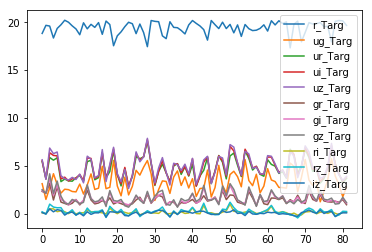

In [8]:
plot = Tf.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17a6c978>,
      dtype=object)

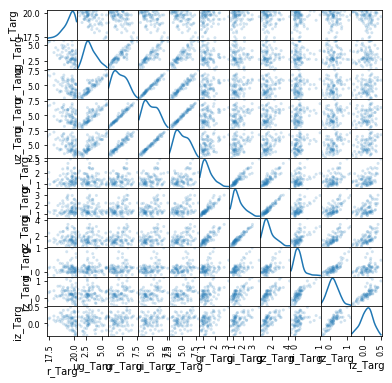

In [10]:
#or a scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(Tf, alpha=0.2, figsize=(6, 6), diagonal='kde')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c7834e0>,
      dtype=object)

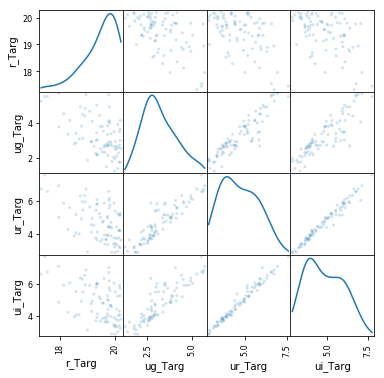

In [10]:

#bit difficoult to digest, I can select just some of them
df1 = Tf.iloc[:,0:4]
scatter_matrix(df1, alpha=0.2, figsize=(6, 6), diagonal='kde')
#Can you guess what do you have on the diagonal?

In [64]:
#and if you want to be quantitative
for l in range (len(df1.T)-1):
    labels = df1.columns
    print ('Pearson coefficient between', labels[l], 'and', labels[l+1])
    print (np.corrcoef(df1.iloc[:,l],df1.iloc[:,l+1])) 

Pearson coefficient between r_Targ and ug_Targ
[[ 1.        -0.5502291]
 [-0.5502291  1.       ]]
Pearson coefficient between ug_Targ and ur_Targ
[[1.         0.90772605]
 [0.90772605 1.        ]]
Pearson coefficient between ur_Targ and ui_Targ
[[1.         0.98473381]
 [0.98473381 1.        ]]


In [33]:
for l in range (len(Tf.T)-1):
    labels = Tf.columns
    print ('Pearson coefficient between', labels[l], 'and', labels[l+1])
    print (np.corrcoef(Tf.iloc[:,l],Tf.iloc[:,l+1]))

Pearson coefficient between r_Targ and ug_Targ
[[ 1.        -0.5502291]
 [-0.5502291  1.       ]]
Pearson coefficient between ug_Targ and ur_Targ
[[1.         0.90772605]
 [0.90772605 1.        ]]
Pearson coefficient between ur_Targ and ui_Targ
[[1.         0.98473381]
 [0.98473381 1.        ]]
Pearson coefficient between ui_Targ and uz_Targ
[[1.         0.98943708]
 [0.98943708 1.        ]]
Pearson coefficient between uz_Targ and gr_Targ
[[1.         0.35235003]
 [0.35235003 1.        ]]
Pearson coefficient between gr_Targ and gi_Targ
[[1.         0.93887244]
 [0.93887244 1.        ]]
Pearson coefficient between gi_Targ and gz_Targ
[[1.        0.9723775]
 [0.9723775 1.       ]]
Pearson coefficient between gz_Targ and ri_Targ
[[1.         0.62106672]
 [0.62106672 1.        ]]
Pearson coefficient between ri_Targ and rz_Targ
[[1.         0.85510138]
 [0.85510138 1.        ]]
Pearson coefficient between rz_Targ and iz_Targ
[[1.         0.81336161]
 [0.81336161 1.        ]]


In [11]:
#=================
# PREPARE DATA
#=================
t=np.array([Tf.r_Targ, Tf.ug_Targ, Tf.gr_Targ, Tf.gi_Targ, Tf.gz_Targ,Tf.ri_Targ, Tf.rz_Targ, Tf.iz_Targ])
Targ = t.T
a=Targ[:len(Tf.r_Targ),] # to sub-select n rows

# NON-TARGET-SAMPLE=========

t_n=np.array([nTf.r_NonTarg, nTf.ug_NonTarg, nTf.gr_NonTarg, nTf.gi_NonTarg, nTf.gz_NonTarg, nTf.ri_NonTarg, nTf.rz_NonTarg, nTf.iz_NonTarg])
nonTarg = t_n.T
b=nonTarg[:len(nTf.r_NonTarg),]


In [11]:
b.shape

(3123, 8)

---

## PART 2:  Prepare your data

---

In [12]:
#-----CREATE matrix X
X = np.concatenate((a,b))
#------and the TARGET column: y
y= np.append(np.ones(len(a)),np.zeros(len(b)))


In [13]:
#scale feature
normalizz=2
if normalizz == 1:
    print ('to the max')
    for i in range(len(X[1,:])): #per tutte le features
        print (i)
        X[:,[i]] = X[:,[i]]/max(X[:,[i]])
if normalizz == 2:
    from sklearn import preprocessing
    print ('rescaling to mean of the features, training sample')
    X = preprocessing.scale(X)
    
if normalizz == 3:
    from sklearn.preprocessing import MinMaxScaler
    min_max_scaler = MinMaxScaler()
    X = min_max_scaler.fit_transform(X)  

if normalizz == 4:
    from sklearn.preprocessing import MaxAbsScaler
    max_abs_scaler = MaxAbsScaler()
    X = max_abs_scaler.fit_transform(X)

if normalizz == 5:
    from sklearn.preprocessing import RobustScaler
    robust_scaler = RobustScaler()
    X = robust_scaler.fit_transform(X)


rescaling to mean of the features, training sample


In [14]:
#divide sample in Training and validation
#by hand 
a.shape
b.shape
X.shape
X_train=  np.concatenate((X[0:50,],X[82:2082,]))
X_val = np.concatenate((X[50:82,],X[2082:3123,]))

y_train= np.append(np.ones(50),np.zeros(2000))
y_val= np.append(np.ones(32),np.zeros(1041))


In [15]:
#finally apply the svm
from sklearn import svm
#clf = svm.SVC(kernel='poly')
clf = svm.SVC(kernel='poly', class_weight={1: 40}, coef0=0.3)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight={1: 40}, coef0=0.3,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
#and the prediction
prediction=clf.predict(X_val) 
#prediction_1 = clf.predict(X_train)
prediction[:10]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
#and now let's evalutate
from sklearn.metrics import accuracy_score
acc = accuracy_score(prediction,y_val)
print (acc)

0.9906803355079217


In [48]:
#===============
# SANITY CHECK
#================
from sklearn import dummy 
dummy = dummy.DummyClassifier()
dummy.fit(X_train, y_train)
DummyPrediction=dummy.predict(X_val) 
acc = accuracy_score(DummyPrediction,y_val)
print (acc)

0.9412861136999068


In [70]:
#TRY OTHER metrics
#confution matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, prediction)
print (cm)

[[1033    8]
 [   3   29]]


In [71]:
#confusion matric of dummy
cm2 = confusion_matrix(y_val, DummyPrediction)
print (cm2)

[[1009   32]
 [  31    1]]


In [18]:
#precition and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pr = precision_score(y_val, prediction)
rc = recall_score(y_val, prediction)
f1 = f1_score(y_val, prediction)


print (pr)
print (rc)
print (f1)



0.7894736842105263
0.9375
0.8571428571428572


In [73]:
#and the dummy classifier?
pr = precision_score(y_val, DummyPrediction)
rc = recall_score(y_val, DummyPrediction)
f1 = f1_score(y_val, DummyPrediction)


print (pr)
print (rc)
print (f1)



0.030303030303030304
0.03125
0.03076923076923077


In [24]:
# we can nowFINE TUNING our SVM, keeping into account the specific nature of the problem
clf = svm.SVC(kernel='poly', class_weight={1: 10}, coef0=0.3)

#complete
clf = svm.SVC(kernel='poly', class_weight={1: 100}, coef0=0.9)
clf.fit(X_train, y_train)


from sklearn.metrics import precision_score
prediction=clf.predict(X_val) 
pr = precision_score(y_val, prediction)
print (pr)

0.8055555555555556


In [79]:
# But we can explore the Hyperparameters in a more systematic way:
from sklearn.cross_validation import StratifiedShuffleSplit
    
accuracy = []
brier = []
precision = []
recall = []
F1 = []

#testing C
C_range = [0.4, 0.6, 0.8]
for C in C_range:    
    #The folds are made by preserving the percentage of samples for each class.
    sss = StratifiedShuffleSplit(y, 3, random_state=0) 
    for train_index, test_index in sss:
        #print("TRAIN:", len(train_index), "TEST:", len(test_index))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = svm.SVC(kernel='poly', class_weight={1: 10}, coef0=C)
        clf.fit(X_train, y_train)
        prediction=clf.predict(X_test)  
        # ACCURACY        
        acc = accuracy_score(prediction,y_test)
        accuracy = np.append(accuracy,acc)
        #PRECISION #tp / (tp + fp)
        pr = precision_score(y_test, prediction)
        precision = np.append(precision,pr)
        #RECALL #tp / (tp + fn)
        rc = recall_score(y_test, prediction)
        recall = np.append(recall,rc)
        #F1: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0        
        f1 = f1_score(y_test, prediction)
        F1 = np.append(F1,f1)
        
        cm = confusion_matrix(y_test, prediction)
        #print('Confusion matrix, without normalization')
        #print (cm)



In [82]:
print (accuracy)

[0.99376947 0.99065421 0.98753894 0.99376947 0.99065421 0.98753894
 0.99376947 0.99065421 0.98753894]


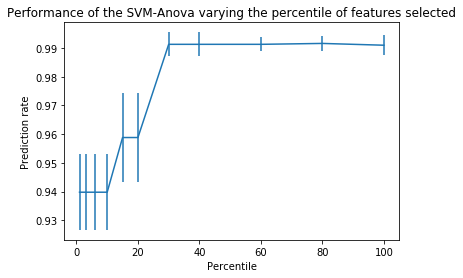

In [84]:
#IF WE WANT to try reduce features
reduction = 0
if reduction == 1:
    # Create a feature-selection transform and an instance of SVM that we
    # combine together to have an full-blown estimator
    from sklearn import svm, feature_selection, cross_validation    
    from sklearn.pipeline import Pipeline
    transform = feature_selection.SelectPercentile(feature_selection.f_classif)
    clf = Pipeline([('anova', transform), ('svc', svm.SVC(kernel='poly', class_weight={1: 10}, coef0=0.8))])
    ###############################################################################
    # Plot the cross-validation score as a function of percentile of features
    score_means = list()
    score_stds = list()
    percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

    for percentile in percentiles:
        clf.set_params(anova__percentile=percentile)
        # Compute cross-validation score using all CPUs
        this_scores = cross_validation.cross_val_score(clf, X, y, n_jobs=1)
        score_means.append(this_scores.mean())
        score_stds.append(this_scores.std())

    import matplotlib.pyplot as plt
    plt.errorbar(percentiles, score_means, np.array(score_stds))
    
    plt.title(
        'Performance of the SVM-Anova varying the percentile of features selected')
    plt.xlabel('Percentile')
    plt.ylabel('Prediction rate')
    plt.axis('tight')
    plt.show()
